# Part 2:  Spatial Interaction models
For this section, you will be given a “symbolic” population and the number of jobs for the stations in the underground. You will also be given the number of people that commute from one station to another, through an OD matrix.

## III. Models and calibration

### III.1. Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.


Overleaf.

### III.2. Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter beta. Make sure to justify your selection of model.

Flows from and to each station are defined as the population and jobs of the station separately5 , and the topological distance between stations is used as distance 6 . Given that we can calculate the population and jobs for every station, Doubly constrained model is the best choice to calibrating $\beta$ , as it has the most constraints and renders better simulation of the system.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("london_flows.csv")

df.rename(columns={"population":"Oi_origpop", "jobs": "Dj_destjob"}, inplace = True)
df.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [3]:
x_variables = ["Oi_origpop", "Dj_destjob","distance"]
for x in x_variables:
    df.loc[df[x] ==0 , x] = 0.000000001

In [4]:
log_x_vars = []
for x in x_variables:
    df[f"log_{x}"] = np.log(df[x])
    log_x_vars.append(f"log_{x}")
df.head(3)

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275


In [5]:
dfmat = pd.pivot_table(df, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
dfmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


### R-Squared and Root Mean Squared Error (RMSE)
 
$r^2$ is the square of the correlation coefficient, $r$

For our sample data, we can calculate this very easily using a little function.

In [6]:
import scipy.stats

def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2


from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

### 1. Unconstrained model

In [7]:
# #create the formula
# formula= 'flows ~ Oi_origpop + Dj_destjob + distance'  
# #run the regression
# uncosim = smf.glm(formula = formula, data=df, family=sm.families.Poisson()).fit()
# print(uncosim.summary())
# print('\n')
formula_u = 'flows ~ log_Oi_origpop + log_Dj_destjob + distance' 
uncosim = smf.glm(formula = formula_u, data=df, family=sm.families.Poisson()).fit()
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61470
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2532e+06
Date:                Sat, 07 May 2022   Deviance:                   2.3341e+06
Time:                        19:26:51   Pearson chi2:                 4.42e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.8896      0.010   -827.

We can see from the summary that the Poisson regression has calibrated all 4 parameters for us and these appear under the ‘estimate’ column:

$K$ (intercept) = -3.7476. Recall $K=\ln k$, hence $k$ can NEVER be negative!

$\alpha$ = 

$\gamma$ = 

and $\beta$ = ,        recall in equation (6) there is a negative sign in front of $\beta$. 

We can also see from the other outputs that all variables are highly significant (P>|z| < 0.01), with the z-scores revealing that distance has the most influence on the model (as we might have expected from the scatter plots we produced earlier which showed that distance had by far the strongers correlation with commuting flows).

These parameters are not too far away from our initial guesses of $\alpha$ = 1, $\gamma$ = 1 and $\beta$ = 2, but how do the estimates compare?

One way to calculate the estimates is to plug all of the parameters back into Equation 6 like this:

In [10]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha1 = uncosim.params[1]
gamma1 = uncosim.params[2]
beta1 = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
df["unconest"] = np.exp(K 
                                       + alpha1*df["log_Oi_origpop"] 
                                       + gamma1*df["log_Dj_destjob"] 
                                       - beta1*df["distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
# predictions = uncosim.get_prediction()
# predictions_summary_frame = predictions.summary_frame()
# df["fitted"] = predictions_summary_frame["mean"]

In [11]:
beta1

8.916253306491282e-05

In [12]:
#round the numbers so that we don't get a half of a person
df["unconest"] = round(df["unconest"], 0)
#convert to integers
df["unconest"] = df["unconest"].astype(int)

In [13]:
uncon_r2 = CalcRSquared(df["flows"], df["unconest"])
uncon_r2

0.3493523739119972

In [14]:
uncon_rmse = CalcRMSE(df["flows"], df["unconest"])
uncon_rmse

106.571

### 2. Origin-constrained model

In [15]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula1 = 'flows ~ station_origin + log_Dj_destjob + distance-1'

#run a production constrained sim
prodsim1 = smf.glm(formula = formula1, data=df, family=sm.families.Poisson()).fit()

#let's have a look at it's summary
#print(prodsim1.summary())

In [16]:
# Now fish the coefficents out of prodsim object
coefs = pd.DataFrame(prodsim1.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i1", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
df = df.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
df.drop(columns = ["coef"], inplace = True)
#check this has worked
df.head()

<ipython-input-16-e83a47bee3c0>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019


Now save parameter values into variables

In [17]:
alpha_i1 = prodsim1.params[:-2]
gamma2 = prodsim1.params[-2]
beta2 = -prodsim1.params[-1]

In [18]:
beta2

0.00015081739033804002

In [19]:
alpha_i1

station_origin[Abbey Road]         -2.881019
station_origin[Acton Central]      -1.147701
station_origin[Acton Town]         -1.600210
station_origin[Aldgate]            -2.912647
station_origin[Aldgate East]       -2.824605
                                      ...   
station_origin[Wood Street]        -0.927394
station_origin[Woodford]           -0.628673
station_origin[Woodgrange Park]    -0.881059
station_origin[Woodside Park]      -1.145095
station_origin[Woolwich Arsenal]    0.535723
Length: 399, dtype: float64

In [20]:
gamma2

0.7509082223436868

And we're ready to generate our estimates:

In [21]:
df["origest"] = np.exp(df["alpha_i1"]+gamma2*df["log_Dj_destjob"] 
                                 - beta2*df["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
df.head(10)

#first round the estimates
df["origest"] = round(df["origest"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
# dfmat3 = df.pivot_table(values ="origsimest1", index="station_origin", columns = "station_destination",
#                             aggfunc=np.sum, margins=True)
# dfmat3

Compare it with real data

In [22]:
orig_r2 = CalcRSquared(df["flows"], df["origest"])

In [23]:
orig_r2

0.4482759616475236

In [24]:
orig_rmse = CalcRMSE(df['flows'],df["origest"])

In [25]:
orig_rmse

97.845

### 3. Destination-constrained model

In [26]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula2 = 'flows ~ station_destination + log_Oi_origpop + distance-1'
#run a production constrained sim
destsim = smf.glm(formula = formula2, data=df, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
# print(destsim.summary())

Now we want to fish the coefficients out of the prodSim glm object.

In [27]:
#We can do this by pulling out the parameter values
coefs_dest = pd.DataFrame(destsim.params)
coefs_dest.reset_index(inplace=True)
coefs_dest.rename(columns = {0:"gamma_j2", "index":"coef_dest"}, inplace = True)
to_repl = ["(station_destination)", "\[", "\]"]

for x in to_repl:
    coefs_dest["coef_dest"] = coefs_dest["coef_dest"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
df = df.merge(coefs_dest, left_on="station_destination", right_on="coef_dest", how = "left")
df.drop(columns = ["coef_dest"], inplace = True)
#check this has worked
df.head()

<ipython-input-27-8197ed8bb4c8>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs_dest["coef_dest"] = coefs_dest["coef_dest"].str.replace(x, "")


,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377


In [28]:
alpha3 = destsim.params[-2]
gamma_j2 = destsim.params[:-2]
beta3 = -destsim.params[-1]

In [29]:
beta3

9.790900753131391e-05

In [31]:
# generate our estimate
df["destest"] = np.exp(df["gamma_j2"]+alpha3*df["log_Oi_origpop"] 
                                 - beta3*df["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
#first round the estimates
df["destest"] = round(df["destest"],0)
df.head(10)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
# dfmat4 = df.pivot_table(values ="destsimest1", index="station_origin", columns = "station_destination",
#                             aggfunc=np.sum, margins=True)
# dfmat4

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510,72.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806,3.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291,5.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377,36.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,3,-2.881019,4.0,-1.955488,7.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,3,-2.881019,5.0,-2.311401,6.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,4,-2.881019,4.0,-1.438504,10.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,3,-2.881019,3.0,-2.040283,6.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,3,-2.881019,4.0,-2.665601,4.0


In [32]:
dest_r2 = CalcRSquared(df["flows"], df["destest"])
dest_r2

0.38495927047905615

In [33]:
dest_rmse = CalcRMSE(df["flows"], df["destest"])
dest_rmse

103.281

### 4. Doubly-constrained model

In [34]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula3= 'flows ~ station_destination + station_origin + distance-1'
#run a doubly constrained sim
doubsim = smf.glm(formula = formula3, data=df, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
#print(doubsim.summary())

In [35]:
beta4 = -doubsim.params[-1]
gamma_j3 = doubsim.params[:399]
alpha_i3 = doubsim.params[399:-1]

In [36]:
beta4

0.00015184728753612003

In [37]:
#get the estimates
df["doubest"] = np.round(doubsim.mu)

In [38]:
df.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest,doubest
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510,72.0,78.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806,3.0,3.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291,5.0,4.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0,109.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377,36.0,48.0


In [39]:
doub_r2 = CalcRSquared(df["flows"],df["doubest"])
doub_r2

0.4766328712585177

In [40]:
doub_rmse = CalcRMSE(df["flows"],df["doubest"])
doub_rmse

95.196

So the goodness of fit has shot up and we can clearly see the origin and destination constraints working, and for most sets of flows, the mdoel is now producing some good estimates. 

### IV. Scenarios
#### IV.1. Scenario A

Assume that **Canary Wharf** has a **50% decrease** in **jobs** after Brexit. Using the calibrated parameter beta, compute the new flows for scenario A. Make sure the number of commuters is conserved.

Here we need to use origin-constrained model to predict the destination.

In [41]:
dfA = df.copy()

In [42]:
# first create a new scenario for this
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = row['Dj_destjob']/2
    else:
        val = row["Dj_destjob"]
    return val
        
dfA["Dj_destjob_A"] = dfA.apply(new_job, axis =1)
dfA.head(10)

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest,doubest,Dj_destjob_A
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510,72.0,78.0,78549.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806,3.0,3.0,442.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291,5.0,4.0,665.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0,109.0,29386.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377,36.0,48.0,15428.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,3,-2.881019,4.0,-1.955488,7.0,5.0,1208.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,3,-2.881019,5.0,-2.311401,6.0,5.0,845.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,4,-2.881019,4.0,-1.438504,10.0,6.0,1748.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,3,-2.881019,3.0,-2.040283,6.0,5.0,850.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,3,-2.881019,4.0,-2.665601,4.0,4.0,611.0


In [43]:
dfA['log_Dj_destjob_A'] = np.log(dfA['Dj_destjob_A'])

In [44]:
# check if the jobs in Canary Wharf decreases by 50%
dfA[dfA['station_destination']=="Canary Wharf"]

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest,doubest,Dj_destjob_A,log_Dj_destjob_A
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0,109.0,29386.0,10.288274
126,Acton Town,Canary Wharf,57,3745.0,58772.0,20398.165882,8.228177,10.981421,9.923200,60,-1.600210,35.0,0.470126,75.0,44.0,29386.0,10.288274
348,Aldgate,Canary Wharf,1,2886.0,58772.0,6564.419680,7.967627,10.981421,8.789419,173,-2.912647,77.0,0.470126,241.0,105.0,29386.0,10.288274
595,Aldgate East,Canary Wharf,3,3172.0,58772.0,5127.998899,8.062118,10.981421,8.542471,210,-2.824605,104.0,0.470126,296.0,143.0,29386.0,10.288274
817,All Saints,Canary Wharf,67,740.0,58772.0,1340.088733,6.606650,10.981421,7.200491,106,-2.844355,181.0,0.470126,153.0,181.0,29386.0,10.288274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood Green,Canary Wharf,64,6667.0,58772.0,16849.246595,8.804925,10.981421,9.732061,124,-1.047702,105.0,0.470126,159.0,143.0,29386.0,10.288274
60838,Wood Lane,Canary Wharf,0,1088.0,58772.0,17092.091760,6.992096,10.981421,9.746371,34,-3.185040,12.0,0.470126,43.0,16.0,29386.0,10.288274
61062,Woodford,Canary Wharf,192,4868.0,58772.0,13963.787075,8.490438,10.981421,9.544223,129,-0.628673,247.0,0.470126,169.0,338.0,29386.0,10.288274
61294,Woodside Park,Canary Wharf,42,3093.0,58772.0,22356.567178,8.036897,10.981421,10.014875,44,-1.145095,42.0,0.470126,54.0,54.0,29386.0,10.288274


**NOTE** Here the total flows have been changed. However, the total flow shouldn't be changed, as those who don't go to Canary Wharf will go to another place.

In [ ]:
# #calculate some new wj^alpha and d_ij^beta values
# gamma_A= dfA["Dj_destjob"]**gamma1
# beta_A = dfA["distance"]**-beta1
# #calcualte the first stage of the Ai values
# dfA["Ai1"] = gamma_A * beta_A
# #now do the sum over all js bit

In [ ]:
# A_i = pd.DataFrame(dfA.groupby(["station_origin"])["Ai1"].agg(np.sum))
# A_i

In [ ]:
# #now divide into 1
# A_i["Ai1"] = 1/A_i["Ai1"]
# A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
# #and write the A_i values back into the dataframe
# dfA = dfA.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [ ]:
# #to check everything works, recreate the original estimates
# dfA["origsimest_A2"] = dfA["A_i"]*dfA["Oi_origpop"]*gamma_A*beta_A
# #round
# dfA["origsimest_A2"] = round(dfA["origsimest_A2"])
# #check
# dfA[["origest", "origsimest_A2"]]

In [45]:
Dj_gamma_A = dfA["Dj_destjob_A"]**gamma2
dist_beta_A = np.exp(dfA["distance"]*-beta2)
#calcualte the first stage of the Bj values
dfA["Ai1"] = Dj_gamma_A * dist_beta_A

#now do the sum over all is bit
A_i = pd.DataFrame(dfA.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
dfA = dfA.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [46]:
dfA.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest,doubest,Dj_destjob_A,log_Dj_destjob_A,Ai1,A_i2
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510,72.0,78.0,78549.0,11.271478,1390.571438,0.0001
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806,3.0,3.0,442.0,6.091310,26.857371,0.0001
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291,5.0,4.0,665.0,6.499787,74.540320,0.0001
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0,109.0,29386.0,10.288274,1051.964320,0.0001
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377,36.0,48.0,15428.0,9.643939,997.800100,0.0001


In [47]:
#to check everything works create the estimates for attrsimest4

#round to integer values
dfA["scenarioest_A"] = dfA["A_i2"]*dfA["Oi_origpop"]*Dj_gamma_A*dist_beta_A
#round
dfA["scenarioest_A"] = round(dfA["scenarioest_A"])

In [48]:
dfA.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest,doubest,Dj_destjob_A,log_Dj_destjob_A,Ai1,A_i2,scenarioest_A
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510,72.0,78.0,78549.0,11.271478,1390.571438,0.0001,84.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806,3.0,3.0,442.0,6.091310,26.857371,0.0001,2.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291,5.0,4.0,665.0,6.499787,74.540320,0.0001,4.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0,109.0,29386.0,10.288274,1051.964320,0.0001,63.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377,36.0,48.0,15428.0,9.643939,997.800100,0.0001,60.0


#### Plot

In [49]:
#plot for the SA
sa_groupby = dfA.groupby('station_destination',as_index=False).agg({'flows':'sum','scenarioest_A':'sum'})
# sa_groupby.sort_values(by=["prodsimest"],ascending= False, inplace = True)
#  = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimestsb1':'sum'})
# orig_dest_sb1.sort_values(by=["prodsimestsb1"],ascending= False, inplace = True)
# orig_dest_sb2 = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimestsb2':'sum'})
# orig_dest_sb2.sort_values(by=["prodsimestsb2"],ascending= False, inplace = True)

# orig_dest_sbx = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimest':'sum','prodsimestsb1':'sum','prodsimestsb2':'sum'})
# orig_dest_sbx.sort_values(by=["prodsimest"],ascending= False, inplace = True)
# len(orig_dest_sbx)

sa_groupby['sa_change'] = sa_groupby['scenarioest_A'] - sa_groupby['flows']
sa_groupby['sa_change_abs'] = sa_groupby['sa_change']**2
sa_groupby = sa_groupby.sort_values(by='sa_change_abs',ascending = False)
sa_plot = sa_groupby[:20]
# sa_plot.sort_values(by = 'sa_change_abs',ascending = True)
sa_plot = sa_plot.sort_values(by = 'sa_change_abs',ascending = True)
sa_plot

,station_destination,flows,scenarioest_A,sa_change,sa_change_abs
375,West Ham,5487,8071.0,2584.0,6677056.0
65,Charing Cross,7016,9747.0,2731.0,7458361.0
278,Richmond,5397,2642.0,-2755.0,7590025.0
296,Shoreditch High Street,7558,4769.0,-2789.0,7778521.0
206,Leicester Square,8847,11708.0,2861.0,8185321.0
113,Embankment,10220,13097.0,2877.0,8277129.0
198,King's Cross St. Pancras,33330,30371.0,-2959.0,8755681.0
354,Uxbridge,4316,1281.0,-3035.0,9211225.0
356,Victoria,33251,30202.0,-3049.0,9296401.0
398,Woolwich Arsenal,4428,1171.0,-3257.0,10608049.0


In [50]:
plt.style.use('fivethirtyeight')

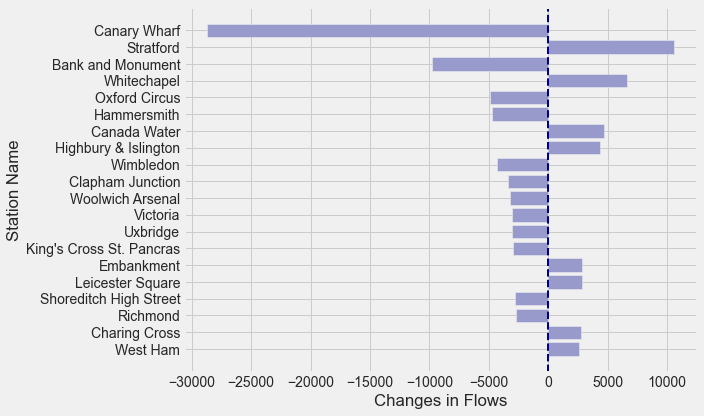

In [134]:
fig, ax1 = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6))

plt.axvline(x=0,linestyle="--",linewidth=2,color="darkblue")
plt.barh(sa_plot['station_destination'],sa_plot['sa_change'],color="#989acc")
ax1.set_xlabel('Changes in Flows')
ax1.set_ylabel('Station Name')
plt.tight_layout()
plt.show()
fig.savefig('scenario_A.png')

#### IV.2 Scenario B
Assume that there is a significant **increase** in the **cost of transport**. Select **2 values** for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

**Answer**

The original $\beta$ equals to xxx. Due to a significant increase in the cost of transport, in this scenario I will use $\beta_1$ = 0.002 and $\beta_2$ = 0.003 to reflect this situation. Here we need to use doubly constrained model.

In [52]:
dfB = df.copy()

In [53]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd


Using the function above we can calculate $A_{i}$ and $B_{j}$ for the previous Poisson model by plugging in the estimate of beta that we generated.

In [54]:
dfB.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest,doubest
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510,72.0,78.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806,3.0,3.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291,5.0,4.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0,109.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377,36.0,48.0


In [55]:
# Use the beta we got from the inverse power model
betaB1 = 10*beta4
# Get the balancing factors.
dfB = balance_doubly_constrained(dfB,'station_origin','station_destination','Oi_origpop','Dj_destjob','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
dfB['scenarioestB1'] = np.round(dfB['Oi_origpop'] * dfB['Ai_exp'] * dfB['Dj_destjob'] * dfB['Bj_exp'] * 
                                   np.exp(dfB['distance']*-beta))
# Check out the matrix
pd.pivot_table(dfB,values='scenarioestB1',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=np.sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,599.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1220.0
Acton Town,0,0,0,16,15,0,11,1,0,17,...,34,4,4,12,0,1,0,2,0,3740.0
Aldgate,0,0,3,0,26,0,0,0,0,21,...,11,0,4,3,0,1,0,2,0,2886.0
Aldgate East,0,0,3,29,0,0,1,0,0,22,...,11,1,4,3,0,2,0,2,0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,4,38,41,0,0,0,0,29,...,14,0,9,0,0,0,0,0,0,4868.0
Woodgrange Park,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,531.0
Woodside Park,0,0,4,20,18,0,1,0,0,24,...,14,0,6,0,0,0,0,0,0,3088.0


In [57]:
# Use the beta we got from the inverse power model
beta = 20*beta4
# Get the balancing factors.
dfB = balance_doubly_constrained(dfB,'station_origin','station_destination','Oi_origpop','Dj_destjob','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
dfB['scenarioestB2'] = np.round(dfB['Oi_origpop'] * dfB['Ai_exp'] * dfB['Dj_destjob'] * dfB['Bj_exp'] * 
                                   np.exp(dfB['distance']*-beta))
# Check out the matrix
pd.pivot_table(dfB,values='scenarioestB2',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=np.sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,598.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1223.0
Acton Town,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,0,0,0,0,0,3746.0
Aldgate,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2884.0
Aldgate East,0,0,0,218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,40,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4869.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530.0
Woodside Park,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,3092.0


In [58]:
dfB.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,alpha_i1,origest,gamma_j2,destest,doubest,Ai_exp,Bj_exp,scenarioestB1,scenarioestB2
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,-2.881019,78.0,0.539510,72.0,78.0,0.205272,129328.172567,95.0,24.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,-2.881019,2.0,-2.514806,3.0,3.0,0.205272,0.107729,3.0,0.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,-2.881019,4.0,-2.640291,5.0,4.0,0.205272,3.474940,4.0,3.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,-2.881019,99.0,0.470126,91.0,109.0,0.205272,51.913455,106.0,73.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,-2.881019,56.0,-0.745377,36.0,48.0,0.205272,0.088365,39.0,193.0


#### IV.3. Plots B1 B2

Using plots, comment on the change in flows obtained for the 3 different situations: scenario A, and scenario B with two selections of parameters. 

Which scenario would have more impact in the redistribution of flows? Explain and justify your answers using the results of the analysis.

##### Plot for scenario B.

In [59]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61474 entries, 0 to 61473
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   Oi_origpop           61474 non-null  float64
 4   Dj_destjob           61474 non-null  float64
 5   distance             61474 non-null  float64
 6   log_Oi_origpop       61474 non-null  float64
 7   log_Dj_destjob       61474 non-null  float64
 8   log_distance         61474 non-null  float64
 9   unconest             61474 non-null  int64  
 10  alpha_i1             61474 non-null  float64
 11  origest              61474 non-null  float64
 12  gamma_j2             61474 non-null  float64
 13  destest              61474 non-null  float64
 14  doubest              61474 non-null  float64
 15  Ai_exp               61474 non-null 

In [60]:
sb_groupby = dfB.groupby('station_destination',as_index=False).agg({'flows':'sum','scenarioestB1':'sum','scenarioestB2':'sum'})

sb_groupby

,station_destination,flows,scenarioestB1,scenarioestB2
0,Abbey Road,345,342.0,345.0
1,Acton Central,750,748.0,749.0
2,Acton Town,2202,2197.0,2202.0
3,Aldgate,7782,7783.0,7777.0
4,Aldgate East,7932,7939.0,7932.0
...,...,...,...,...
394,Wood Street,404,403.0,404.0
395,Woodford,706,707.0,707.0
396,Woodgrange Park,242,243.0,242.0
397,Woodside Park,745,744.0,745.0


In [61]:
sb_groupby['sb_change1'] = sb_groupby['scenarioestB1'] - sb_groupby['flows']
sb_groupby['sb_change2'] = sb_groupby['scenarioestB2'] - sb_groupby['flows']
sb_groupby['sb_change_sq1'] = sb_groupby['sb_change1']**2
sb_groupby['sb_change_sq2'] = sb_groupby['sb_change2']**2
sb_groupby1 = sb_groupby.sort_values(by='sb_change_sq1',ascending = False)[0:20]
sb_groupby2 = sb_groupby.sort_values(by='sb_change_sq2',ascending = False)[0:20]

In [62]:
# beta = 10*beta4 sorted changes
sb_beta1= sb_groupby1.sort_values(by = 'sb_change_sq1',ascending = True)
sb_beta1

,station_destination,flows,scenarioestB1,scenarioestB2,sb_change1,sb_change2,sb_change_sq1,sb_change_sq2
272,Queensway,1882,1874.0,1880.0,-8.0,-2.0,64.0,4.0
136,Gospel Oak,2025,2017.0,2026.0,-8.0,1.0,64.0,1.0
253,Paddington,20198,20190.0,20195.0,-8.0,-3.0,64.0,9.0
276,Redbridge,198,189.0,198.0,-9.0,0.0,81.0,0.0
327,Stratford,55954,55945.0,55952.0,-9.0,-2.0,81.0,4.0
17,Barking,7004,7013.0,7003.0,9.0,-1.0,81.0,1.0
372,West Brompton,5859,5850.0,5857.0,-9.0,-2.0,81.0,4.0
244,Northwood,1018,1009.0,1018.0,-9.0,0.0,81.0,0.0
45,Buckhurst Hill,228,219.0,228.0,-9.0,0.0,81.0,0.0
116,Epping,498,488.0,498.0,-10.0,0.0,100.0,0.0


In [63]:
# beta = 20*beta4 sorted change
sb_beta2 = sb_groupby2.sort_values(by = 'sb_change_sq2',ascending = True)

sb_beta2

,station_destination,flows,scenarioestB1,scenarioestB2,sb_change1,sb_change2,sb_change_sq1,sb_change_sq2
203,Lancaster Gate,1820,1813.0,1814.0,-7.0,-6.0,49.0,36.0
64,Chancery Lane,15391,15390.0,15385.0,-1.0,-6.0,1.0,36.0
228,Moorgate,24574,24584.0,24568.0,10.0,-6.0,100.0,36.0
198,King's Cross St. Pancras,33330,33332.0,33324.0,2.0,-6.0,4.0,36.0
181,Hyde Park Corner,2410,2406.0,2404.0,-4.0,-6.0,16.0,36.0
138,Great Portland Street,6936,6938.0,6930.0,2.0,-6.0,4.0,36.0
222,Marble Arch,6145,6144.0,6138.0,-1.0,-7.0,1.0,49.0
81,Covent Garden,4355,4352.0,4348.0,-3.0,-7.0,9.0,49.0
139,Green Park,26754,26756.0,26761.0,2.0,7.0,4.0,49.0
318,St. Paul's,13446,13446.0,13438.0,0.0,-8.0,0.0,64.0


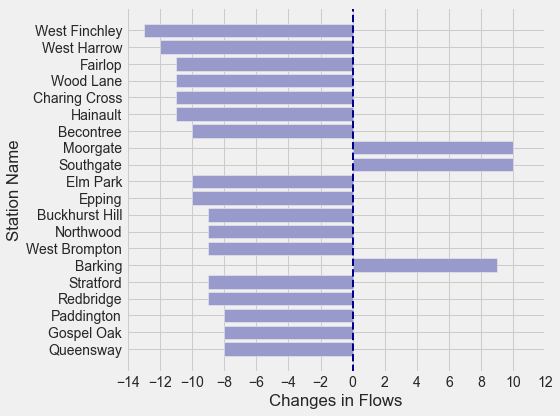

In [120]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(nrows = 1,ncols = 1,figsize = (8,6))


plt.axvline(x=0, color='darkblue',linewidth=2,linestyle="--")
plt.barh(sb_beta1['station_destination'],sb_beta1['sb_change1'],color="#989acc")
ax1.xaxis.set_ticks(np.arange(-14,14,2))
ax1.set_xlabel('Changes in Flows')
ax1.set_ylabel('Station Name')

# plt.barh(sb_groupby2['station_destination'],sb_groupby2['sb_change2'])
# ax2.set_xlabel('Changes in Flows')
# ax2.set_ylabel('Station Name')

plt.tight_layout()
plt.show()
fig.savefig('scenario_B1.png')

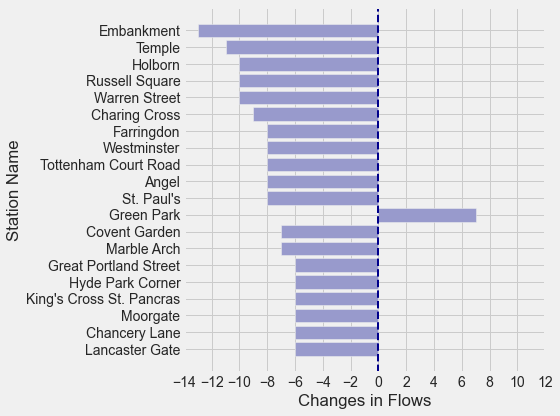

In [121]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(nrows = 1,ncols = 1,figsize = (8,6))


plt.axvline(x=0, color='darkblue',linewidth=2,linestyle="--")
plt.barh(sb_beta2['station_destination'],sb_beta2['sb_change2'],color="#989acc")
ax1.xaxis.set_ticks(np.arange(-14,14,2))
ax1.set_xlabel('Changes in Flows')
ax1.set_ylabel('Station Name')

# plt.barh(sb_groupby2['station_destination'],sb_groupby2['sb_change2'])
# ax2.set_xlabel('Changes in Flows')
# ax2.set_ylabel('Station Name')

plt.tight_layout()
plt.show()
fig.savefig('scenarioB2.png')

In [89]:
dfB['sb_change1'] = dfB['scenarioestB1'] - dfB['flows']
dfB['sb_change2'] = dfB['scenarioestB2'] - dfB['flows']

In [90]:
dfB

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,distance,log_Oi_origpop,log_Dj_destjob,log_distance,unconest,...,origest,gamma_j2,destest,doubest,Ai_exp,Bj_exp,scenarioestB1,scenarioestB2,sb_change1,sb_change2
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,62,...,78.0,0.539510,72.0,78.0,0.205272,129328.172567,95.0,24.0,95.0,24.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,2.0,-2.514806,3.0,3.0,0.205272,0.107729,3.0,0.0,2.0,-1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3,...,4.0,-2.640291,5.0,4.0,0.205272,3.474940,4.0,3.0,1.0,0.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66,...,99.0,0.470126,91.0,109.0,0.205272,51.913455,106.0,73.0,105.0,72.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,...,56.0,-0.745377,36.0,48.0,0.205272,0.088365,39.0,193.0,2.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549,8.973605,8.114325,9.503144,23,...,100.0,-0.782020,72.0,189.0,345382.882773,92938.545653,226.0,2.0,99.0,-125.0
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,51,...,296.0,-1.805391,41.0,177.0,345382.882773,0.001015,159.0,0.0,-449.0,-608.0
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,7,...,36.0,-3.157145,10.0,27.0,345382.882773,44.135385,30.0,13.0,24.0,7.0
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,18,...,125.0,-2.197192,38.0,132.0,345382.882773,0.003688,110.0,776.0,29.0,695.0


In [94]:
merge = sb_groupby.merge(sa_groupby, left_on="station_destination", right_on="station_destination", how = "left")

In [95]:
merge

,station_destination,flows_x,scenarioestB1,scenarioestB2,sb_change1,sb_change2,sb_change_sq1,sb_change_sq2,flows_y,scenarioest_A,sa_change,sa_change_abs
0,Abbey Road,345,342.0,345.0,-3.0,0.0,9.0,0.0,345,411.0,66.0,4356.0
1,Acton Central,750,748.0,749.0,-2.0,-1.0,4.0,1.0,750,361.0,-389.0,151321.0
2,Acton Town,2202,2197.0,2202.0,-5.0,0.0,25.0,0.0,2202,2181.0,-21.0,441.0
3,Aldgate,7782,7783.0,7777.0,1.0,-5.0,1.0,25.0,7782,8564.0,782.0,611524.0
4,Aldgate East,7932,7939.0,7932.0,7.0,0.0,49.0,0.0,7932,9527.0,1595.0,2544025.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,Wood Street,404,403.0,404.0,-1.0,0.0,1.0,0.0,404,394.0,-10.0,100.0
395,Woodford,706,707.0,707.0,1.0,1.0,1.0,1.0,706,671.0,-35.0,1225.0
396,Woodgrange Park,242,243.0,242.0,1.0,0.0,1.0,0.0,242,161.0,-81.0,6561.0
397,Woodside Park,745,744.0,745.0,-1.0,0.0,1.0,0.0,745,433.0,-312.0,97344.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


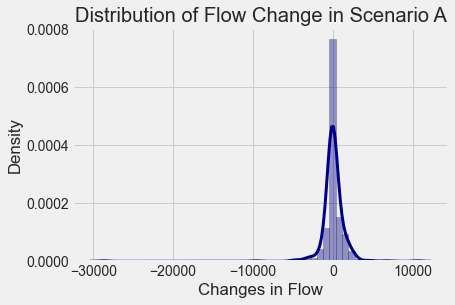

In [141]:
fig, ax1 = plt.subplots(nrows = 1,ncols = 1)
sns.distplot(merge['sa_change'], hist=True, kde=True, 
            color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
# Add labels
plt.title('Distribution of Flow Change in Scenario A')
plt.xlabel('Changes in Flow')
plt.ylabel('Density')
# fig.savefig("distributionA.png")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

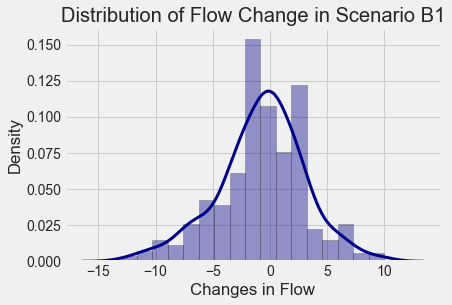

In [142]:
# matplotlib histogram

# plt.hist(merge['sb_change1'], color = 'lightblue')

# seaborn histogram
fig, ax1 = plt.subplots(nrows = 1,ncols = 1)
sns.distplot(merge['sb_change1'], hist=True, kde=True, 
            color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})


# Add labels
plt.title('Distribution of Flow Change in Scenario B1')
plt.xlabel('Changes in Flow')
plt.ylabel('Density')
# fig.savefig("distributionB1.png")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

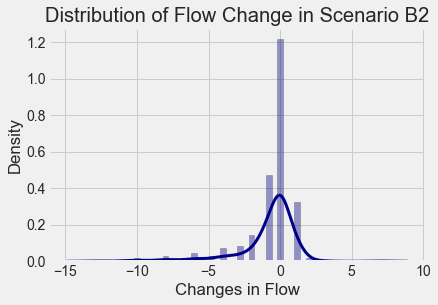

In [143]:
fig, ax1 = plt.subplots(nrows = 1,ncols = 1)
sns.distplot(merge['sb_change2'], hist=True, kde=True, 
            color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})


# Add labels
plt.title('Distribution of Flow Change in Scenario B2')
plt.xlabel('Changes in Flow')
plt.ylabel('Density')
# fig.savefig("distributionB2.png")